Import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline. (4 points)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read in the iris data set and examine the head to make sure the data is in a usable format (2 points)

In [4]:
dataset = pd.read_csv('./LuisMoros_Assignment4_data/iris.txt')
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns (1 point)

In [5]:
reducedDataset = dataset.loc[:,['PetalLength','PetalWidth']]
reducedDataset

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


Create a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies. (1 point)

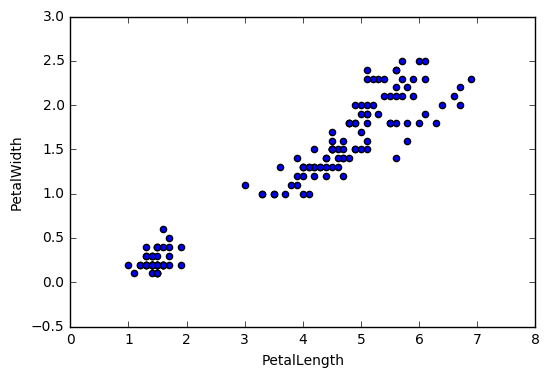

In [6]:
_=plt.scatter(reducedDataset['PetalLength'],reducedDataset['PetalWidth'])
_=plt.xlabel('PetalLength')
_=plt.ylabel('PetalWidth')

Implement the basic functions to create a regression model
- Create a function to calculate the coefficients of a least squares approximation (1 point)
- Create a function to use the least squares coefficients to predict the value of a given input point (1 point)

In [67]:
from numpy.linalg import inv

def regress(x:pd.DataFrame, y:pd.DataFrame):
    """
    Calculates the coefficients of the covariates in th x matrix
    """    
    if len(x.columns)!=2 or len(x.iloc[:,0][lambda s: s==1])!=len(x.index):
        raise Exception('x needs to have two columns, first one should have only 1s')
    X,Y = x.as_matrix(), y.as_matrix()
    Xt = X.transpose()
    return inv(Xt.dot(X)).dot((Xt.dot(Y)))

def predict(x:pd.DataFrame,b:np.ndarray):
    """
    linear prediction based on covariates in x and 
    coefficients in b
    """
    if len(b)<1:
        raise exception("the parameter 'b' cannot be empty")           
    intercept = b[0]
    coefficients = np.matrix(b[1:]) if len(b)>1 else \
                   np.matrix(np.zeros(len(x.columns)))
    X = np.matrix(x)    
    return intercept + coefficients.transpose().dot(X) 

Using your regression model, calculate the points along the regression line of the reduced data set (1 point)

In [91]:
# obtaining x matrix
x = reducedDataset
x['intercept'] = pd.Series(1, x.index)
x = x.loc[:,['intercept','PetalLength']]

# obtaining y matrix
y = reducedDataset['PetalWidth']

# obtaining betas
betas = regress(x,y)

# predict y hat 
yhat = predict(reducedDataset['PetalLength'], betas)

# transform y hat from a 1 x 150 matrix to a vector
yhat = yhat.A1

Plot the regression line on top of a scatter plot of the reduced data set (you will need to remove duplicate X values to get matplotlib to draw an actual line) (2 points)

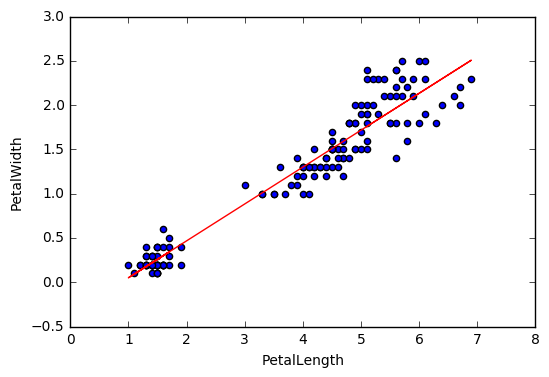

In [92]:
_=plt.scatter(reducedDataset['PetalLength'],reducedDataset['PetalWidth'])
_=plt.xlabel('PetalLength')
_=plt.ylabel('PetalWidth')
_=plt.plot(reducedDataset['PetalLength'], yhat, color='r')